In [1]:
'''
In this script, we prepare the census tracts
and split the shapefile in smaller parts
for better performance when running the main
application.
'''

'\nIn this script, we prepare the census tracts\nand split the shapefile in smaller parts\nfor better performance when running the main\napplication.\n'

In [53]:
from shapely.geometry import Polygon, MultiPolygon, LineString
from shapely.ops import split
import geopandas as gpd
import pandas as pd
gpd.options.use_pygeos = True

In [17]:
def divide_bbox(rectangle, nrows, ncols):
    
    '''
    Divides a rectangular bounding box in
    rows and columns
    
    Reference: https://stackoverflow.com/questions/58283684/how-to-divide-a-rectangle-in-specific-number-of-rows-and-columns
    '''
    
    minx, miny, maxx, maxy = rectangle.bounds
    
    dx = (maxx - minx) / nrows  # width of a small part
    
    dy = (maxy - miny) / ncols  # height of a small part
    
    horizontal_splitters = [LineString([(minx, miny + i*dy), (maxx, miny + i*dy)]) for i in range(ncols)]
    
    vertical_splitters = [LineString([(minx + i*dx, miny), (minx + i*dx, maxy)]) for i in range(nrows)]
    
    splitters = horizontal_splitters + vertical_splitters
    
    for splitter in splitters:
        rectangle = MultiPolygon(split(rectangle, splitter))
        
    return [ split_rectangle for split_rectangle in rectangle ]

In [63]:
def main():
    
    gdf = gpd.read_file("../data/setores_censitarios_shp_reduzido/")
    
    brazil_bbox = Polygon([
        [-74.3143068749,-34.2970741167],
        [-34.4119631249,-34.2970741167],
        [-34.4119631249,5.648611595],
        [-74.3143068749,5.648611595],
        [-74.3143068749,-34.2970741167]
    ])
    
    
    # Splits the bbox in a 30 x 30 grid
    
    smaller_bboxes = divide_bbox(brazil_bbox, 30, 30)
    
    smaller_bboxes = gpd.GeoDataFrame(geometry=smaller_bboxes).reset_index().rename(columns={'index':'id_no'})
        
    # Find the neighboring bounding boxes.

    def find_neighbors(row, smaller_bboxes):
        
        neighbors = smaller_bboxes [ ~smaller_bboxes.geometry.disjoint(row.geometry)].id_no.tolist()
                
        return pd.Series({"neighbors": neighbors})


    smaller_bboxes['neighbors'] = smaller_bboxes.apply(find_neighbors, args=[smaller_bboxes], axis=1)

    df['neighbor_count'] = df.neighbors.str.len()
    
    return smaller_bboxes

    
    # Find all census tracts that inersect with the bounding box.

        # If they are 100% inside, do nothing.

        # If they aren't, calculate the insersection percentage.

    # Adjust the population.

    # Fix the geometry column with the right outline.
        
        
    # For each group of neighboring bounding boxes:
    
        # Find the population of all neighbors.
        
    # Return a json object
        

    
    

In [64]:
if __name__ == "__main__":
    df = main()
    display(df)

,id_no,geometry,neighbors
0,0,"POLYGON ((-34.41196 -34.29707, -35.74204 -34.2...","[0, 1, 58, 59]"
1,1,"POLYGON ((-35.74204 -34.29707, -37.07212 -34.2...","[0, 1, 2, 57, 58, 59]"
2,2,"POLYGON ((-37.07212 -34.29707, -38.40220 -34.2...","[1, 2, 3, 56, 57, 58]"
3,3,"POLYGON ((-38.40220 -34.29707, -39.73228 -34.2...","[2, 3, 4, 55, 56, 57]"
4,4,"POLYGON ((-39.73228 -34.29707, -41.06235 -34.2...","[3, 4, 5, 54, 55, 56]"
...,...,...,...
895,895,"POLYGON ((-41.06235 5.64861, -39.73228 5.64861...","[864, 865, 866, 894, 895, 896]"
896,896,"POLYGON ((-39.73228 5.64861, -38.40220 5.64861...","[865, 866, 867, 895, 896, 897]"
897,897,"POLYGON ((-38.40220 5.64861, -37.07212 5.64861...","[866, 867, 868, 896, 897, 898]"
898,898,"POLYGON ((-37.07212 5.64861, -35.74204 5.64861...","[867, 868, 869, 897, 898, 899]"


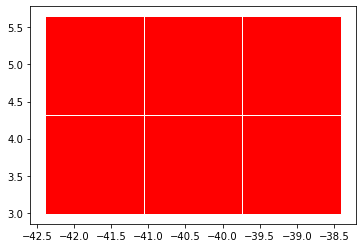

In [69]:
ax = df [ df.id_no.isin(df.loc[895, 'neighbors'])].plot(color='red', edgecolor='white')

In [76]:
def get_len(arr):
    
    return len(arr)